# **Healthcare Predictive Analytics Project**

## **Problem Description** 
The **Healthcare Predictive Analytics** project aims to develop a predictive model for breast cancer classification. The model will analyze clinical measurements and cell features to classify tumors as either malignant or benign, supporting healthcare professionals in making more accurate diagnoses.

---

## **Project Steps**  

1. **Data Collection and Cleaning:** Gather and clean historical clinical data to ensure it is ready for analysis.  
2. **Data Exploration:** Analyze the data to uncover patterns, trends, and key insights that may impact breast cancer diagnosis.  
3. **Model Development:** Build a classification model for breast cancer prediction.  
4. **Model Optimization:** Tune the model to improve accuracy and reduce classification errors.  

---

## Dataset Columns  

| **Column Name**              | **Description** |
|------------------------------|-----------------|
| `id`                          | Unique identifier for each patient. |
| `diagnosis`                   | Diagnosis result (M = Malignant, B = Benign). |
| `radius_mean`                 | Mean radius of cell nuclei. |
| `texture_mean`                | Mean texture (standard deviation of gray-scale values). |
| `perimeter_mean`              | Mean perimeter of cell nuclei. |
| `area_mean`                   | Mean area of cell nuclei. |
| `smoothness_mean`             | Mean smoothness (local variation in radius lengths). |
| `compactness_mean`            | Mean compactness (perimeter² / area - 1.0). |
| `concavity_mean`              | Mean severity of concave portions of the contour. |
| `concave points_mean`         | Mean number of concave points on the contour. |
| `symmetry_mean`               | Mean symmetry of cell nuclei. |
| `fractal_dimension_mean`      | Mean "coastline approximation" (complexity of shape). |
| `radius_se`                   | Standard error of radius. |
| `texture_se`                  | Standard error of texture. |
| `perimeter_se`                | Standard error of perimeter. |
| `area_se`                     | Standard error of area. |
| `smoothness_se`               | Standard error of smoothness. |
| `compactness_se`              | Standard error of compactness. |
| `concavity_se`                | Standard error of concavity. |
| `concave points_se`           | Standard error of concave points. |
| `symmetry_se`                 | Standard error of symmetry. |
| `fractal_dimension_se`        | Standard error of fractal dimension. |
| `radius_worst`                | Worst (largest) radius of cell nuclei. |
| `texture_worst`               | Worst texture (largest deviation of gray-scale values). |
| `perimeter_worst`             | Worst perimeter of cell nuclei. |
| `area_worst`                  | Worst area of cell nuclei. |
| `smoothness_worst`            | Worst smoothness. |
| `compactness_worst`           | Worst compactness. |
| `concavity_worst`             | Worst concavity. |
| `concave points_worst`        | Worst concave points. |
| `symmetry_worst`              | Worst symmetry. |
| `fractal_dimension_worst`     | Worst fractal dimension. |
| `Unnamed: 32`                 | Unused column (can be ignored or dropped). |


## Importing Libiraries

In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
custom_palette = ["#FF0000", "#CC0000", "#990000", "#660000", "#FF6666"]  # درجات من اللون الأحمر
sns.set_theme(style="darkgrid", palette=custom_palette)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc ,classification_report,accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE


## **Data Collection and Cleaning**

In [40]:
df = pd.read_csv(r"C:\Users\mokha\Desktop\My_Projects\Big_projects\Healthcare Predictive Analytics Project\data.csv")

In [41]:
df.shape

(569, 33)

In [42]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [43]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
# Checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [45]:
# checking null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [46]:
#check Dublicaties
df[df.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [47]:
#check imbalance
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [48]:
df.shape

(569, 33)

In [49]:
cat_features = df.select_dtypes(include="O").columns
num_features = df.select_dtypes(exclude="O").columns

In [50]:
cat_features

Index(['diagnosis'], dtype='object')

In [51]:
num_features

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [52]:
df.drop(["Unnamed: 32", 'id'], inplace=True,axis=1)

In [53]:
df.shape

(569, 31)

In [54]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [55]:
df["diagnosis"] = df["diagnosis"].replace({"M" : 1 , "B" : 0})

C:\Users\mokha\AppData\Local\Temp\ipykernel_5724\4225792686.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [56]:
df["diagnosis"].unique()

array([1, 0])

# **Data Exploration**

In [57]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### What is the distribution of the diagnosis (Benign vs Malignant) in the dataset?

In [58]:
df["diagnosis"].unique()

array([1, 0])

In [59]:
px.pie(df , names="diagnosis",title="Distribution of Diagnosis",hole=0.5)

### Observation 
#### we can see the 62.7% of doens't suffer from cancer

In [60]:
X = df.drop("diagnosis",axis=1)
y = df["diagnosis"]

### Which features have the highest correlation with the diagnosis?


<Axes: >

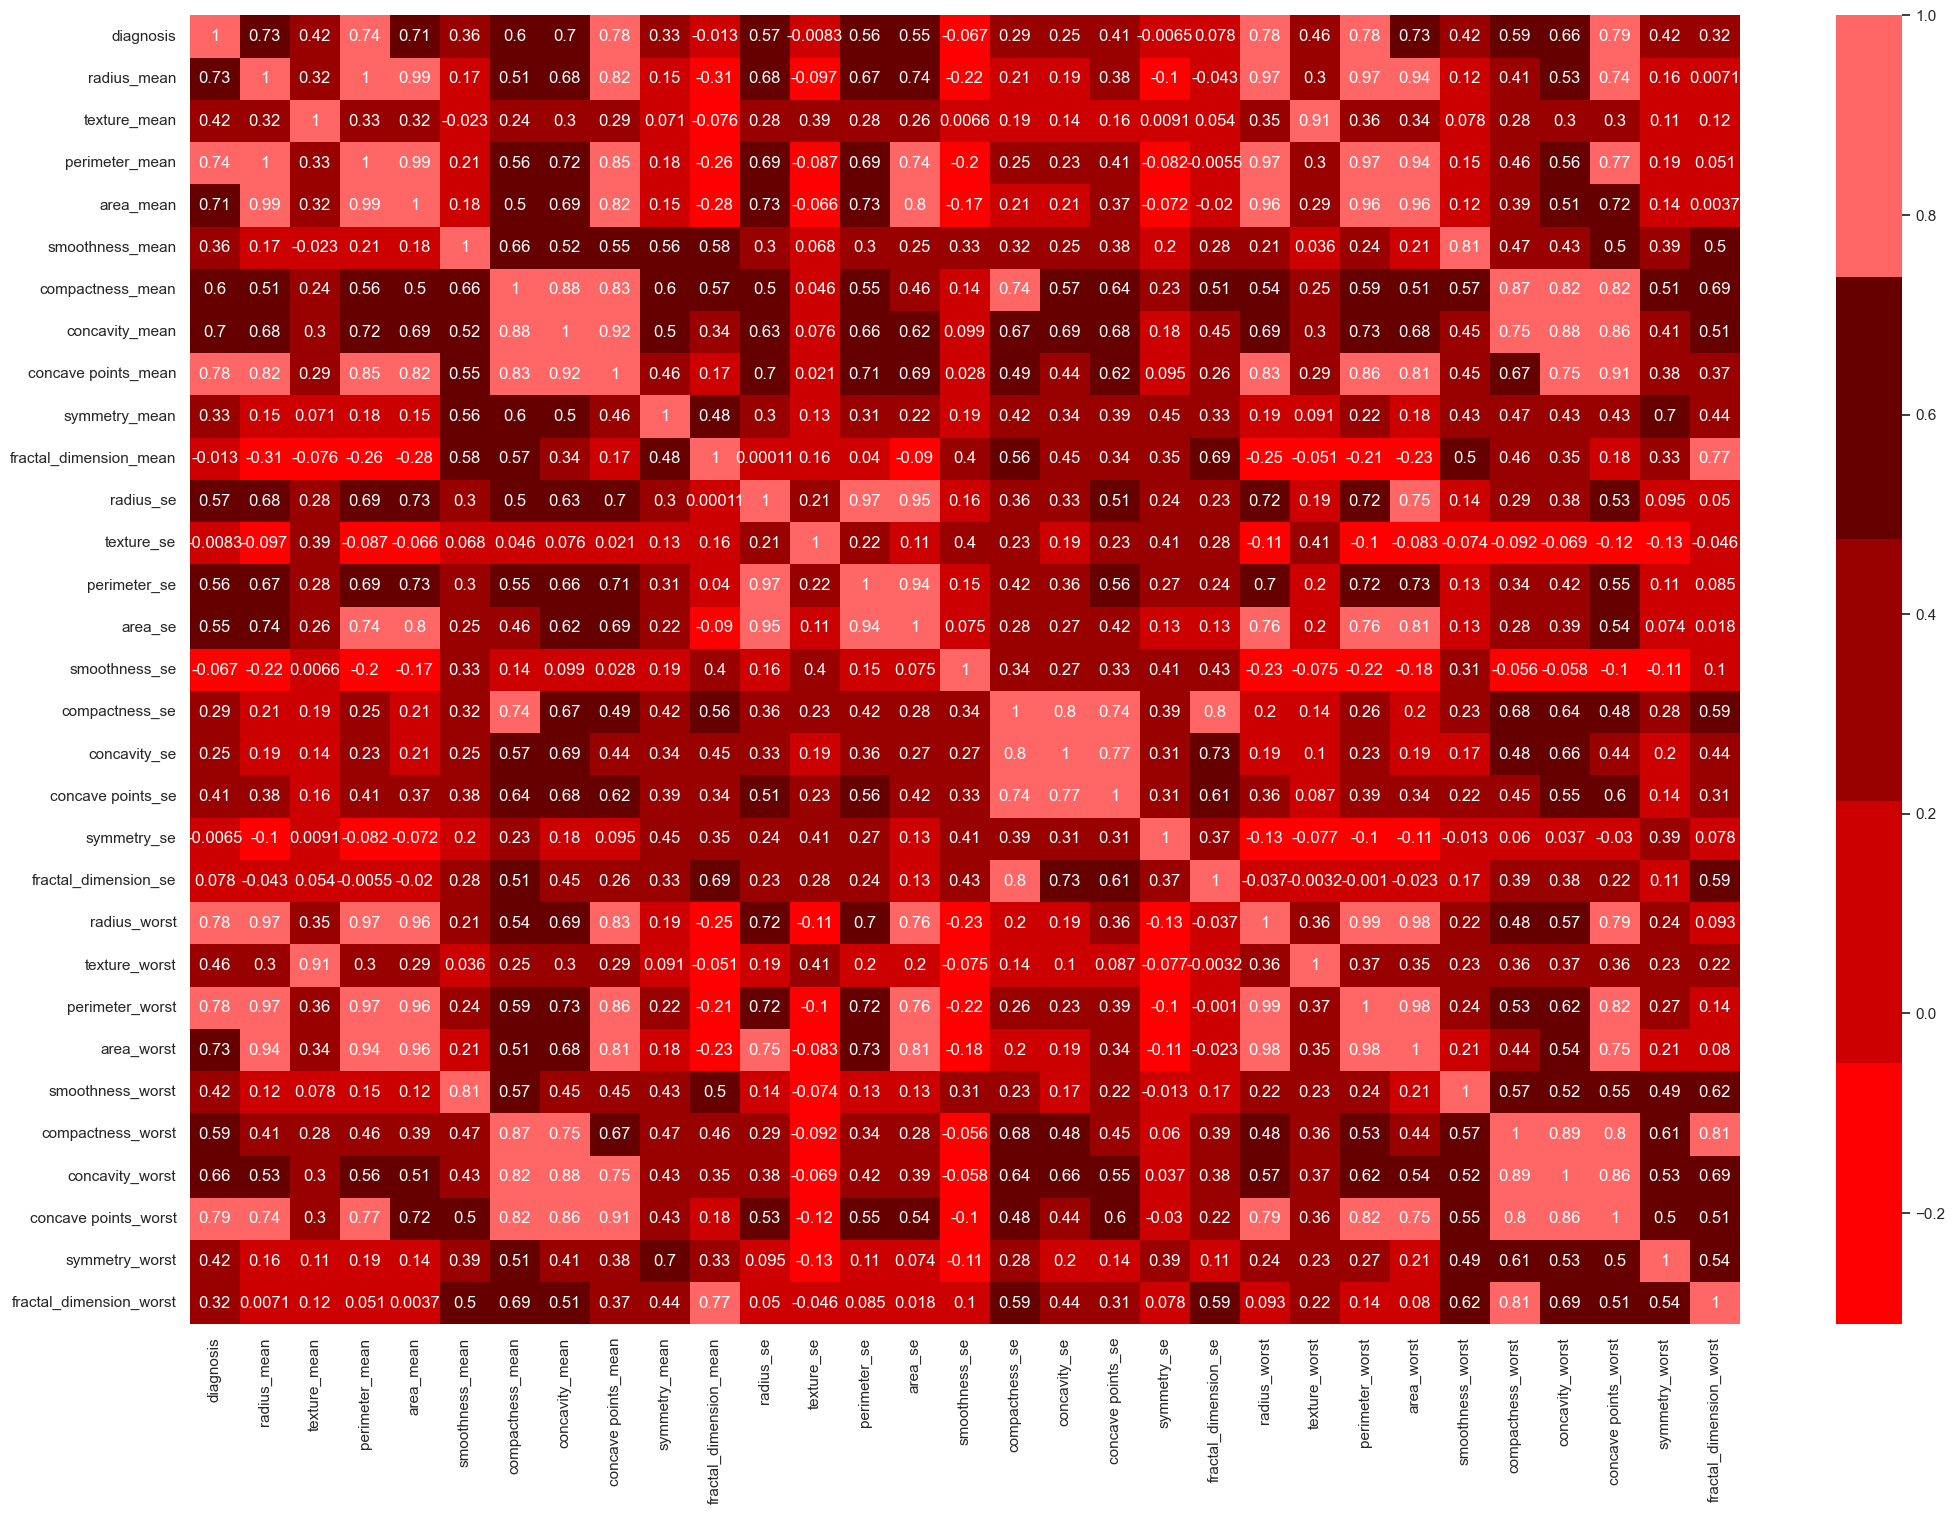

In [61]:
plt.figure(figsize=(25,17))
sns.heatmap(df.corr(),annot=True,cmap=custom_palette)

### Observation
#### The concave points_worst have the strongest relation with diagonsis


### Is there a significant difference in the mean radius (radius_mean) between benign and malignant cases?

<Axes: ylabel='radius_mean'>

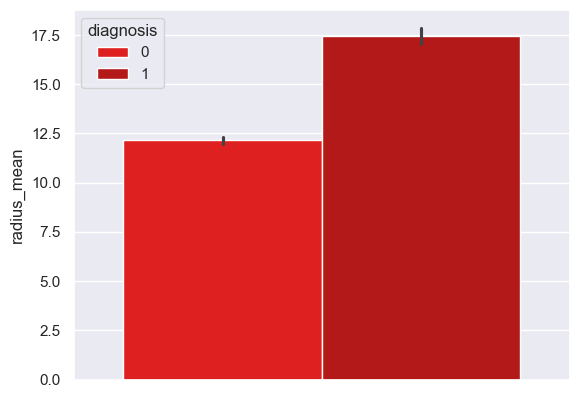

In [62]:
sns.barplot(y="radius_mean",hue="diagnosis",data=df)

### Observation
#### the radius_mean is good indicator for diagnosis

### What is the relationship between cell size (area_mean) and compactness (compactness_mean)?

<Axes: xlabel='area_mean', ylabel='compactness_mean'>

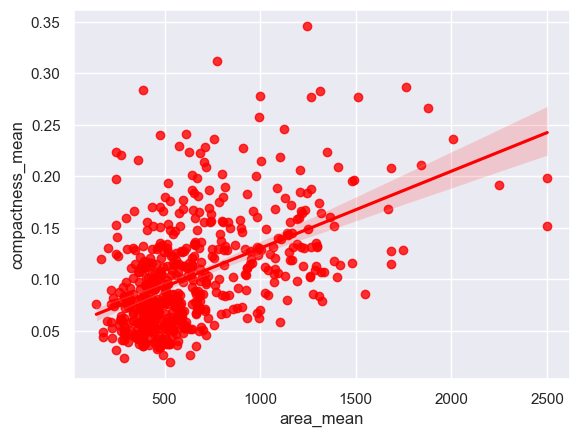

In [63]:
sns.regplot(x = "area_mean" , y = "compactness_mean",data=df)

### Observation
#### The relation between compactness_mean and area_mean Direct relationship

### Feature Selection

In [64]:
# select the best 10 features by XGB
model = XGBClassifier()
model.fit(X, y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 5. طباعة الميزات مع أهميتها
most_important = feature_importance_df["Feature"][0:10].to_list()

X = X[most_important]


In [65]:
X.columns

Index(['radius_worst', 'perimeter_worst', 'concave points_mean',
       'concave points_worst', 'area_worst', 'area_mean', 'texture_worst',
       'concavity_worst', 'radius_se', 'texture_mean'],
      dtype='object')

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,shuffle=True,stratify=y,random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [68]:
y_train.value_counts()

diagnosis
0    250
1    148
Name: count, dtype: int64

In [69]:
X_train

array([[ 1.45951037,  1.86817555,  2.84839268, ...,  2.34642696,
         1.88658218,  1.04974466],
       [ 0.50829368,  0.50191659,  0.55700173, ...,  1.05257355,
        -0.25041371, -0.90994477],
       [-0.36245131, -0.28041517, -0.60664497, ..., -0.08079455,
        -0.95807347, -0.99333581],
       ...,
       [-0.40371885, -0.48535402, -0.78717571, ..., -1.08871822,
        -0.51996415,  1.31844912],
       [ 0.03165365,  0.13956095, -0.45717875, ..., -0.10785864,
        -0.21195785,  0.25289695],
       [ 1.30682049,  1.22662786,  1.68983853, ...,  1.39301131,
         0.31815802,  1.3161327 ]])

In [70]:
X_test

array([[ 0.01975756,  0.03492231, -0.54758418, ...,  0.5399097 ,
        -0.53936693,  0.09364728],
       [-0.53584829, -0.6116086 , -1.10045004, ..., -1.09773634,
        -0.57764825, -0.01035304],
       [-1.40977869, -1.43266687, -1.32647477, ..., -1.31944146,
        -0.05738681,  1.32274196],
       ...,
       [ 0.02602379,  0.07690483,  0.22837725, ...,  0.25207683,
        -0.40811667,  0.19528396],
       [-0.52958205, -0.58162108, -0.79176971, ..., -0.57993238,
        -0.32681442,  0.61128524],
       [ 2.44270036,  2.19702242,  0.44087458, ...,  0.64618646,
         1.23141782,  3.19711135]])

## **Modeling Development**

In [71]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "Support Vector Classifier (SVC)": SVC(degree=3)
}


In [72]:

def eval_metric(y,test_y):
    print(classification_report(y,test_y))
    print(accuracy_score(y,test_y))
    print(confusion_matrix(y,test_y))

In [73]:
for name, model in models.items():
    print("#"*60)
    print(name)
    mod = model.fit(X_train,y_train)
    y_train_pred = mod.predict(X_train)
    y_pred = mod.predict(X_test)
    print("-"*60)
    print("Train Model")
    print("_"*60)
    
    eval_metric(y_train,y_train_pred)
    
    print("="*60)
    print("Test Model")
    print("_"*60)
    
    eval_metric(y_pred,y_test)
    


############################################################
Logistic Regression
------------------------------------------------------------
Train Model
____________________________________________________________
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       250
           1       0.96      0.93      0.95       148

    accuracy                           0.96       398
   macro avg       0.96      0.95      0.96       398
weighted avg       0.96      0.96      0.96       398

0.9597989949748744
[[244   6]
 [ 10 138]]
Test Model
____________________________________________________________
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

0.982456140350877

C:\Users\mokha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



------------------------------------------------------------
Train Model
____________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       148

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

1.0
[[250   0]
 [  0 148]]
Test Model
____________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       112
           1       0.92      1.00      0.96        59

    accuracy                           0.97       171
   macro avg       0.96      0.98      0.97       171
weighted avg       0.97      0.97      0.97       171

0.9707602339181286
[[107   5]
 [  0  59]]
############################################################
XGBoost Cl

#### choosing SVC ,logreg and GB for hyperparmaeters tuning

## **Modeling Optmization**

In [74]:

svc_hyperparameters = {
    'C': [0.1, 1, 10, 100],             
    'kernel': ['linear', 'rbf', 'poly'], 
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  
    'degree': [2, 3, 4, 5],              
    'probability': [True, False]         
}


logreg_hyperparameters = {
    'C': [0.1, 1, 10, 100],               
    'penalty': ['l2', 'l1', 'elasticnet'], 
    'solver': ['lbfgs', 'saga', 'liblinear'], 
    'max_iter': [100, 200, 500]           
}


gb_hyperparameters = {
    'n_estimators': [50, 100, 200],       
    'learning_rate': [0.01, 0.1, 0.2],    
    'max_depth': [3, 5, 7],               
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],        
    'subsample': [0.8, 1.0]               
}




In [75]:
list_ = [
    ("Logistic Regression", LogisticRegression(),logreg_hyperparameters),
    ("SVC",SVC(),svc_hyperparameters ),
    ("gradient Boast",GradientBoostingClassifier(),gb_hyperparameters )
]

In [76]:
for name , model ,params in list_ :
    print("_"*50)
    print(name)
    rand = RandomizedSearchCV(estimator=model,param_distributions=params,n_jobs = -1,refit=True,cv=5)
    rand.fit(X_train,y_train)
    y_pred = rand.predict(X_test)
    y_train_pred = rand.predict(X_train)
    print("\t"*5,"Train")
    eval_metric(y_train,y_train_pred)
    print("\t"*5,"Test")
    eval_metric(y_test,y_pred)
    print(rand.best_params_)
    print("_"*50)
    

__________________________________________________
Logistic Regression


KeyboardInterrupt: 

#### Best Models with ROC 

In [77]:

SVC_model = SVC(probability= True, kernel= 'rbf', gamma= 0.1, degree= 3,C= 1)
SVC_model.fit(X_train,y_train)
y_pred = SVC_model.predict(X_test)
y_train_pred = SVC_model.predict(X_train)
print("Train\n")
eval_metric(y_train,y_train_pred)
print("\nTest\n")
eval_metric(y_test,y_pred)


Train

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       250
           1       0.97      0.97      0.97       148

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

0.9748743718592965
[[245   5]
 [  5 143]]

Test

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

0.9883040935672515
[[107   0]
 [  2  62]]


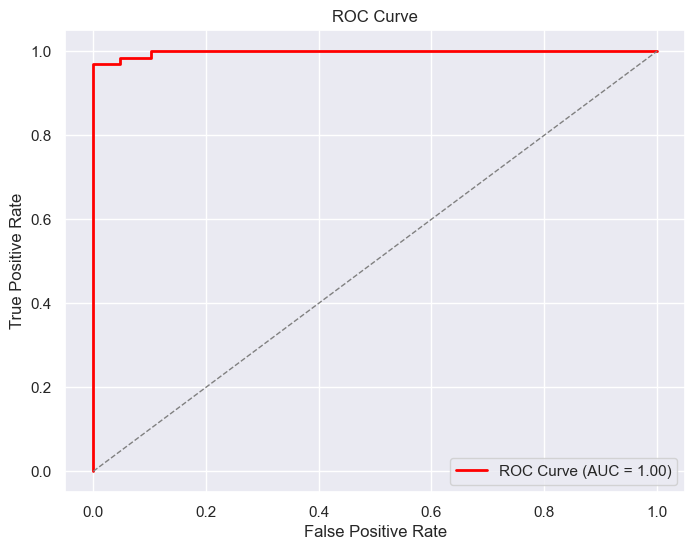

In [78]:

y_proba = SVC_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()